In [2]:
import pandas as pd


In [7]:
data = pd.read_csv("C:/Users/soph/Documents/datascience/adm/lab/bank_transactions.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [9]:
data.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [11]:
data.dropna(inplace=True)

In [13]:
data.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [18]:
data.CustomerDOB=pd.to_datetime(data.CustomerDOB)

In [19]:
data.TransactionDate=pd.to_datetime(data.TransactionDate)

In [20]:
data.TransactionDate=pd.to_datetime(data.TransactionDate)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 79.5+ MB


In [28]:
def convert_time(value):
    sec = value%100
    minutes = (value//100)%100
    hours=(value//10000) %100
    date= str(hours)+":"+str(minutes)+":"+str(sec)
    return return datetime.strptime(date)

In [23]:
data.TransactionTime.loc[0]

143207

In [24]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [29]:
from datetime import datetime

In [30]:
data.TransactionTime = data.TransactionTime.apply(lambda x: datetime.strptime(str(x).zfill(6), '%H%M%S'))

<AxesSubplot:>

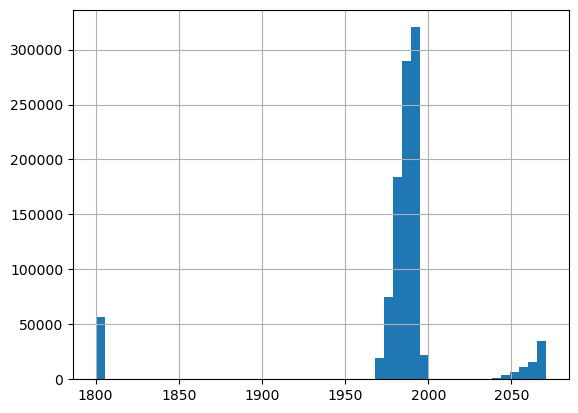

In [31]:
data.CustomerDOB.dt.year.hist(bins=50)

In [34]:
data.loc[data.CustomerDOB.dt.year > 2000, 'CustomerDOB'] = data.loc[data.CustomerDOB.dt.year > 2000, 'CustomerDOB'] - pd.DateOffset(years = 100)

In [35]:

data.drop(data[data.CustomerDOB.dt.year ==1800].index, axis=0, inplace=True)

<AxesSubplot:>

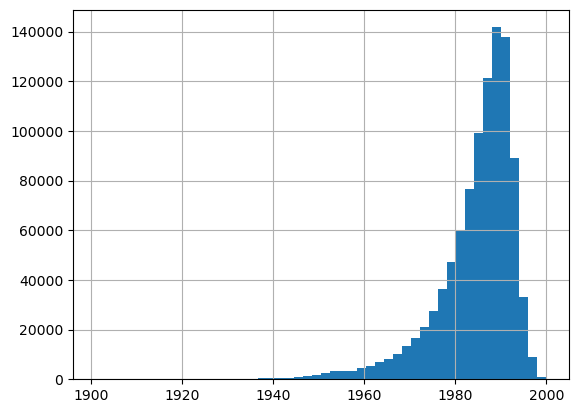

In [36]:
data.CustomerDOB.dt.year.hist(bins=50)

### Customer Transaction

<AxesSubplot:ylabel='Frequency'>

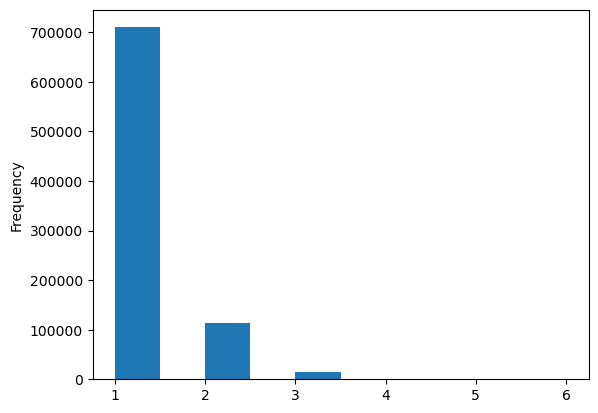

In [37]:
data.groupby('CustomerID').TransactionID.count().plot.hist()

In [41]:
import numpy as np

In [ ]:
np.timedelta64(1,'Y')

In [42]:
data['CustomerAge']=((pd.to_datetime('today')- data.CustomerDOB)/np.timedelta64(1,'Y')).round(0)

In [43]:
data['CustomerAge'] = data['CustomerAge'].astype(int)

In [44]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,1900-01-01 14:32:07,25.0,28
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,1900-01-01 14:18:58,27999.0,66
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,1900-01-01 14:27:12,459.0,26
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,1900-01-01 14:27:14,2060.0,49
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,1900-01-01 18:11:56,1762.5,35
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,1900-01-01 18:48:24,799.0,32
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,1900-01-01 18:37:34,460.0,31
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,1900-01-01 18:33:13,770.0,34
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,1900-01-01 18:47:06,1000.0,44


### Transaction date

In [50]:
data.TransactionTime.dt.hour.value_counts().sort_index()

0     16883
1      8262
2      5150
3      4372
4      4232
5      5005
6      7693
7     13683
8     22250
9     31019
10    39592
11    48483
12    56365
13    60496
14    62106
15    60466
16    60213
17    64864
18    75008
19    89905
20    92320
21    76216
22    50713
23    30026
Name: TransactionTime, dtype: int64

In [51]:
data['TransactionAmount (INR)'].value_counts().sort_index()

0.00          708
0.01           24
0.03            1
0.04            3
0.05            5
             ... 
720001.16       1
724122.00       1
991132.22       1
1380002.88      1
1560034.99      1
Name: TransactionAmount (INR), Length: 86783, dtype: int64

<AxesSubplot:ylabel='Frequency'>

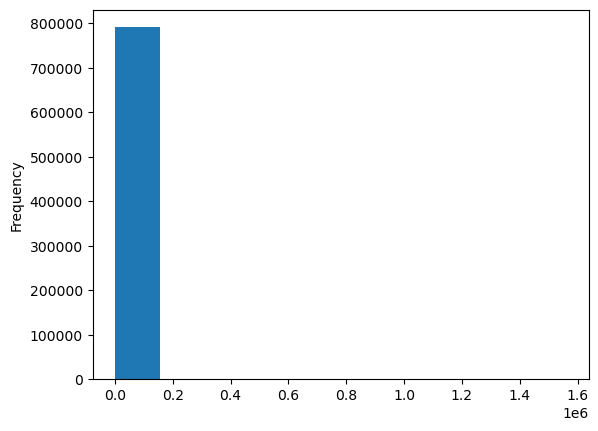

In [52]:
data.loc[data['TransactionAmount (INR)']>100 ,'TransactionAmount (INR)'].plot.hist()

In [56]:
data['TransactionAmount (INR)'] =data['TransactionAmount (INR)'].astype(int)

In [58]:
data['Utilisation'] = data['CustAccountBalance'] - data['TransactionAmount (INR)']

In [60]:
data.to_pickle('bank.pkl')

In [62]:
data=pd.read_pickle('bank.pkl')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985322 entries, 0 to 1048566
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            985322 non-null  object        
 1   CustomerID               985322 non-null  object        
 2   CustomerDOB              985322 non-null  datetime64[ns]
 3   CustGender               985322 non-null  object        
 4   CustLocation             985322 non-null  object        
 5   CustAccountBalance       985322 non-null  float64       
 6   TransactionDate          985322 non-null  datetime64[ns]
 7   TransactionTime          985322 non-null  datetime64[ns]
 8   TransactionAmount (INR)  985322 non-null  int32         
 9   CustomerAge              985322 non-null  int32         
 10  Utilisation              985322 non-null  float64       
dtypes: datetime64[ns](3), float64(2), int32(2), object(4)
memory usage: 82.7+ MB


In [64]:
data[data.CustomerID=='C3226689']

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,Utilisation
19882,T19883,C3226689,1990-01-01,M,BASTI,11369.40,2016-09-26,1900-01-01 13:13:42,200,33,11169.40
35613,T35614,C3226689,1987-09-15,M,NOIDA,96820.46,2016-09-30,1900-01-01 14:50:16,418,35,96402.46
218661,T218662,C3226689,1984-04-11,F,NEW DELHI,1667.83,2016-08-08,1900-01-01 19:02:33,4700,39,-3032.17
756541,T756542,C3226689,1972-09-17,M,SHARJAH,588826.94,2016-01-09,1900-01-01 16:55:54,6351,50,582475.94
836123,T836124,C3226689,1977-07-20,M,THANE,369.36,2016-04-09,1900-01-01 13:46:45,1749,45,-1379.64
984048,T984049,C3226689,1985-05-21,M,GURGAON,12977.22,2016-09-15,1900-01-01 19:59:29,1340,38,11637.22


In [65]:
data.groupby('CustomerID').CustAccountBalance.last()

CustomerID
C1010011    120180.54
C1010012     24204.49
C1010014    161848.76
C1010018       496.18
C1010024     87058.65
              ...    
C9099836    133067.23
C9099877     96063.46
C9099919      5559.75
C9099941     35295.92
C9099956      6968.93
Name: CustAccountBalance, Length: 839081, dtype: float64

In [67]:
age_balance=data[['CustomerID', 'CustomerAge','CustAccountBalance' ]].groupby('CustomerID').last()

In [66]:
import seaborn as sns

<AxesSubplot:xlabel='CustomerAge', ylabel='CustAccountBalance'>

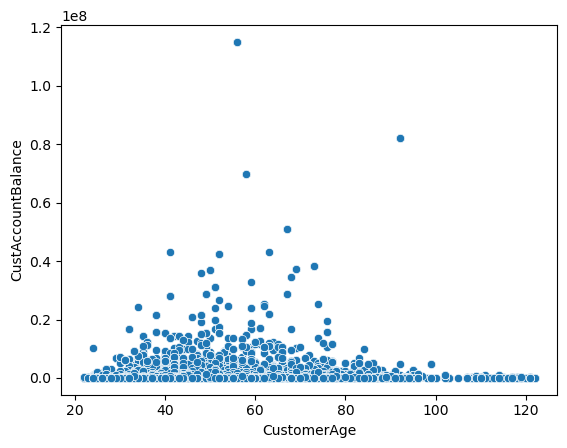

In [69]:
sns.scatterplot(x=age_balance.CustomerAge, y=age_balance.CustAccountBalance)

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [72]:
age_balance_sample= age_balance.sample(1000)

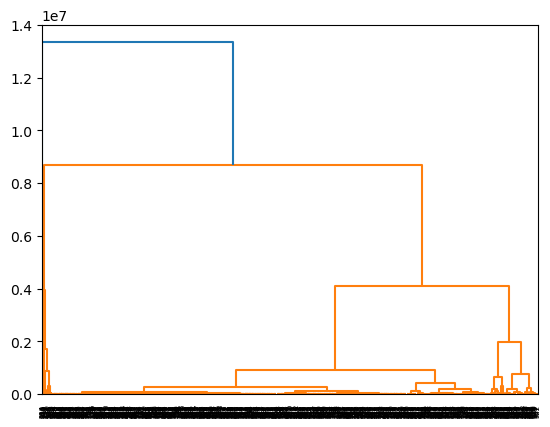

In [74]:
dend=dendrogram(linkage(age_balance_sample,method='ward'))

In [76]:
from sklearn.cluster import AgglomerativeClustering

In [86]:
model = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='single')

In [87]:
model.fit(age_balance_sample)

AgglomerativeClustering(linkage='single', n_clusters=20)

In [88]:
age_balance_sample['cluster']=model.fit_predict(age_balance_sample)

In [ ]:
sns.color_palette('hls', 8)

In [89]:
unique_values=len(age_balance_sample.cluster.unique())

<AxesSubplot:xlabel='CustomerAge', ylabel='CustAccountBalance'>

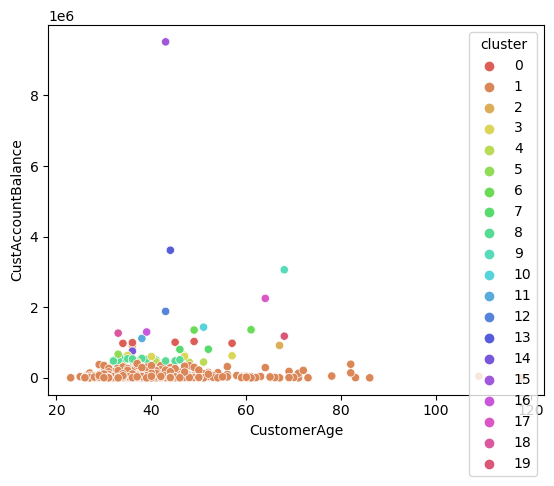

In [90]:
sns.scatterplot(x=age_balance_sample.CustomerAge, 
                y=age_balance_sample.CustAccountBalance, 
                palette=sns.color_palette('hls',unique_values),
                hue=age_balance_sample.cluster)

In [92]:
from sklearn import preprocessing

In [95]:
scalar=preprocessing.MinMaxScaler()

In [97]:
age_balance_norm=scalar.fit_transform(age_balance)

In [100]:
data.drop(data.loc[data['TransactionAmount (INR)']>1000].index, axis=0, inplace=True)

In [101]:
age_balance=data[['CustomerID', 'CustomerAge','CustAccountBalance' ]].groupby('CustomerID').last()

In [103]:
data['CustAccountBalanceLog']=np.log(data.CustAccountBalance)

C:\Users\soph\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [110]:
data.loc[data['CustAccountBalanceLog'] == -np.inf, 'CustAccountBalanceLog'] = -1

In [111]:
age_balance = data[['CustomerID', 'CustomerAge', 'CustAccountBalanceLog']].groupby('CustomerID').last()

In [114]:
age_balance_sample=age_balance.sample(1000)

In [104]:
from sklearn.cluster import KMeans

In [117]:
model = KMeans(n_clusters=8)
age_balance_sample['cluster'] = model.fit_predict(age_balance_sample)

In [122]:
unique_values=len(age_balance_sample.cluster.unique())
sns.scatterplot(x=age_balance_sample.CustomerAge, 
                y=age_balance_sample.CustAccountBalanceLog, 
                palette=sns.color_palette('hls',unique_values),
                hue=age_balance_sample.cluster)

ValueError: The palette list has the wrong number of colors.

In [118]:
model.inertia_

7228.0396162946

In [120]:
sd={}
for k in range(10,20):
    model=KMeans(n_clusters=k)
    model.fit(age_balance_sample)
    sd[k]=model.inertia_

Text(0.5, 0, 'number of cluster')

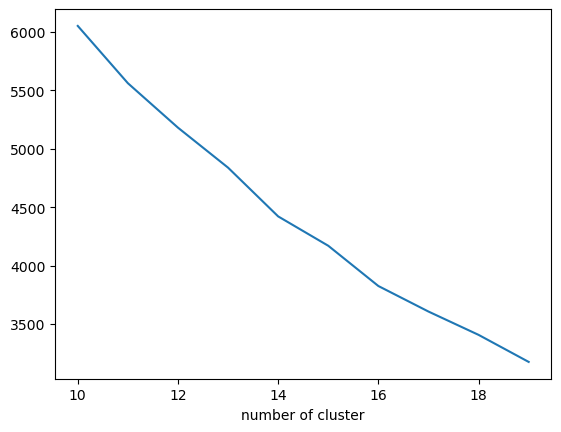

In [125]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sd.keys()), list(sd.values()))
plt.xlabel('number of cluster')


In [128]:
!pip install yellowbrick

In [129]:
from yellowbrick.cluster import KElbowVisualizer

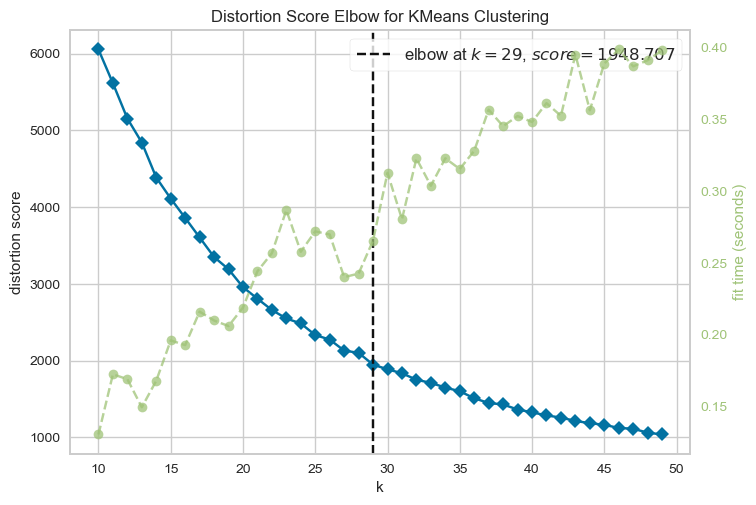

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [131]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(10,50))

visualizer.fit(age_balance_sample)        # Fit the data to the visualizer
visualizer.show()    

In [135]:
three_features = data[['CustomerID','TransactionAmount (INR)','CustomerAge','CustAccountBalanceLog']].groupby('CustomerID').mean()
three_features_sample = three_features.sample(2000)
three_features_sample['cluster'] = model.fit_predict(three_features_sample)

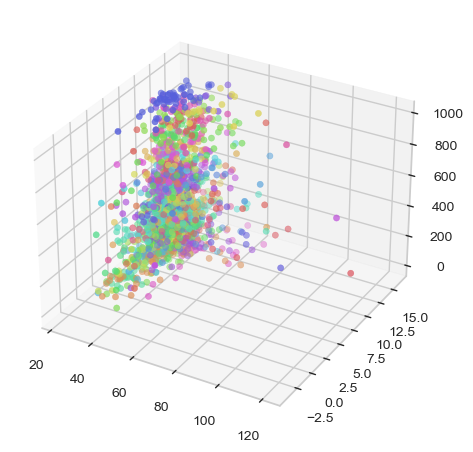

In [136]:
from mpl_toolkits.mplot3d import Axes3D

unique_values = len(age_balance_sample.cluster.unique())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(three_features_sample.CustomerAge, 
           three_features_sample.CustAccountBalanceLog, 
           three_features_sample['TransactionAmount (INR)'], 
           c=three_features_sample.cluster,
          cmap=sns.color_palette('hls', unique_values, as_cmap=True))
#ax.view_init(-10, 15)
plt.show()